# Auswertung Laufzeit

#### Importe

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import timeit
from pathlib import Path
from scipy.optimize import curve_fit

#### Import Plot Stylesheet

In [2]:
plt.style.use(['seaborn-v0_8-paper', Path.cwd().parent / 'plotstyle' / 'paper.mplstyle'])
cm = 1/2.54

#### Laden der Laufzeit für klassische Berechnung

In [3]:
calc_time_data_file = Path.cwd().parent / 'data' / 'pred_time.npz'
calc_data = np.load(calc_time_data_file)

calc_time_1 = np.array(calc_data['pred_time_1'])
calc_time_100 = np.array(calc_data['pred_time_100'])
calc_time_500 = np.array(calc_data['pred_time_500'])
calc_time_1000 = np.array(calc_data['pred_time_1000'])
calc_time_5000 = np.array(calc_data['pred_time_5000'])
calc_time_10000 = np.array(calc_data['pred_time_10000'])

calc_time = [calc_time_1, calc_time_100, calc_time_500, calc_time_1000, calc_time_5000, calc_time_10000]

#### Laden der Laufzeit für Vorhersage mit aNN

In [4]:
ann_time_data_file = Path.cwd().parent / 'data' / 'ann_time.npz'
ann_data = np.load(ann_time_data_file)

ann_time_1 = np.array(ann_data['ann_time_1'])
ann_time_100 = np.array(ann_data['ann_time_100'])
ann_time_500 = np.array(ann_data['ann_time_500'])
ann_time_1000 = np.array(ann_data['ann_time_1000'])
ann_time_5000 = np.array(ann_data['ann_time_5000'])
ann_time_ztsd = np.array(ann_data['ann_time_10000'])
ann_time_zwtsd = np.array(ann_data['ann_time_20000'])
ann_time_hdtsd = np.array(ann_data['ann_time_hdtsd'])

ann_time = [ann_time_1, ann_time_100, ann_time_500, ann_time_1000, ann_time_5000, ann_time_ztsd, ann_time_zwtsd, ann_time_hdtsd]

#### Laden Laufzeit für Vorhersage mit kNN

In [5]:
knn_time_data_file = Path.cwd().parent / 'data' / 'knn_time.npz'
knn_data = np.load(knn_time_data_file)

knn_time_1 = np.array(knn_data['knn_time_1'])
knn_time_100 = np.array(knn_data['knn_time_100'])
knn_time_500 = np.array(knn_data['knn_time_500'])
knn_time_1000 = np.array(knn_data['knn_time_1000'])
knn_time_5000 = np.array(knn_data['knn_time_5000'])
knn_time_ztsd = np.array(knn_data['knn_time_10000'])
knn_time_zwtsd = np.array(knn_data['knn_time_20000'])
knn_time_hdtsd = np.array(knn_data['knn_time_hdtsd'])

knn_time = [knn_time_1, knn_time_100, knn_time_500, knn_time_1000, knn_time_5000, knn_time_ztsd, knn_time_zwtsd, knn_time_hdtsd]

#### Laden der Laufzeit für Vorhersage des XGBoost-Modells

In [6]:
xgb_time_data_file = Path.cwd().parent / 'data' / 'xgb_time.npz'
xgb_data = np.load(xgb_time_data_file)

xgb_time_1 = np.array(xgb_data['xgb_time_1'])
xgb_time_100 = np.array(xgb_data['xgb_time_100'])
xgb_time_500 = np.array(xgb_data['xgb_time_500'])
xgb_time_1000 = np.array(xgb_data['xgb_time_1000'])
xgb_time_5000 = np.array(xgb_data['xgb_time_5000'])
xgb_time_ztsd = np.array(xgb_data['xgb_time_10000'])
xgb_time_zwtsd = np.array(xgb_data['xgb_time_20000'])
xgb_time_hdtsd = np.array(xgb_data['xgb_time_hdtsd'])

xgb_time = [xgb_time_1, xgb_time_100, xgb_time_500, xgb_time_1000, xgb_time_5000, xgb_time_ztsd, xgb_time_zwtsd, xgb_time_hdtsd]

#### Kurve durch Datenpunkte legen - Berechnung

In [7]:
# # objective function
# def objective(x, a, b):
#     y = a * (x**b)
#     return y

# # fit curve
# popt,_ = curve_fit(objective, [1, 100, 1000], calc_time)

# a,b = popt
# x_fit_calc = np.linspace(0, 100000, 1000)
# y_fit_calc = objective(x_fit_calc, a, b)

#### Kurve durch Datenpunkte legen - aNN

In [8]:
# # objective function
# def objective(x, a, b):
#     y = a * (x**b)
#     return y

# # fit curve
# popt,_ = curve_fit(objective, [100, 1000, 10000, 20000, 100000], ann_time)

# a,b = popt
# x_fit_ann = np.linspace(0, 100000, 1000)
# y_fit_ann = objective(x_fit_ann, a, b)

#### Plot Verlauf der Berechnungszeit

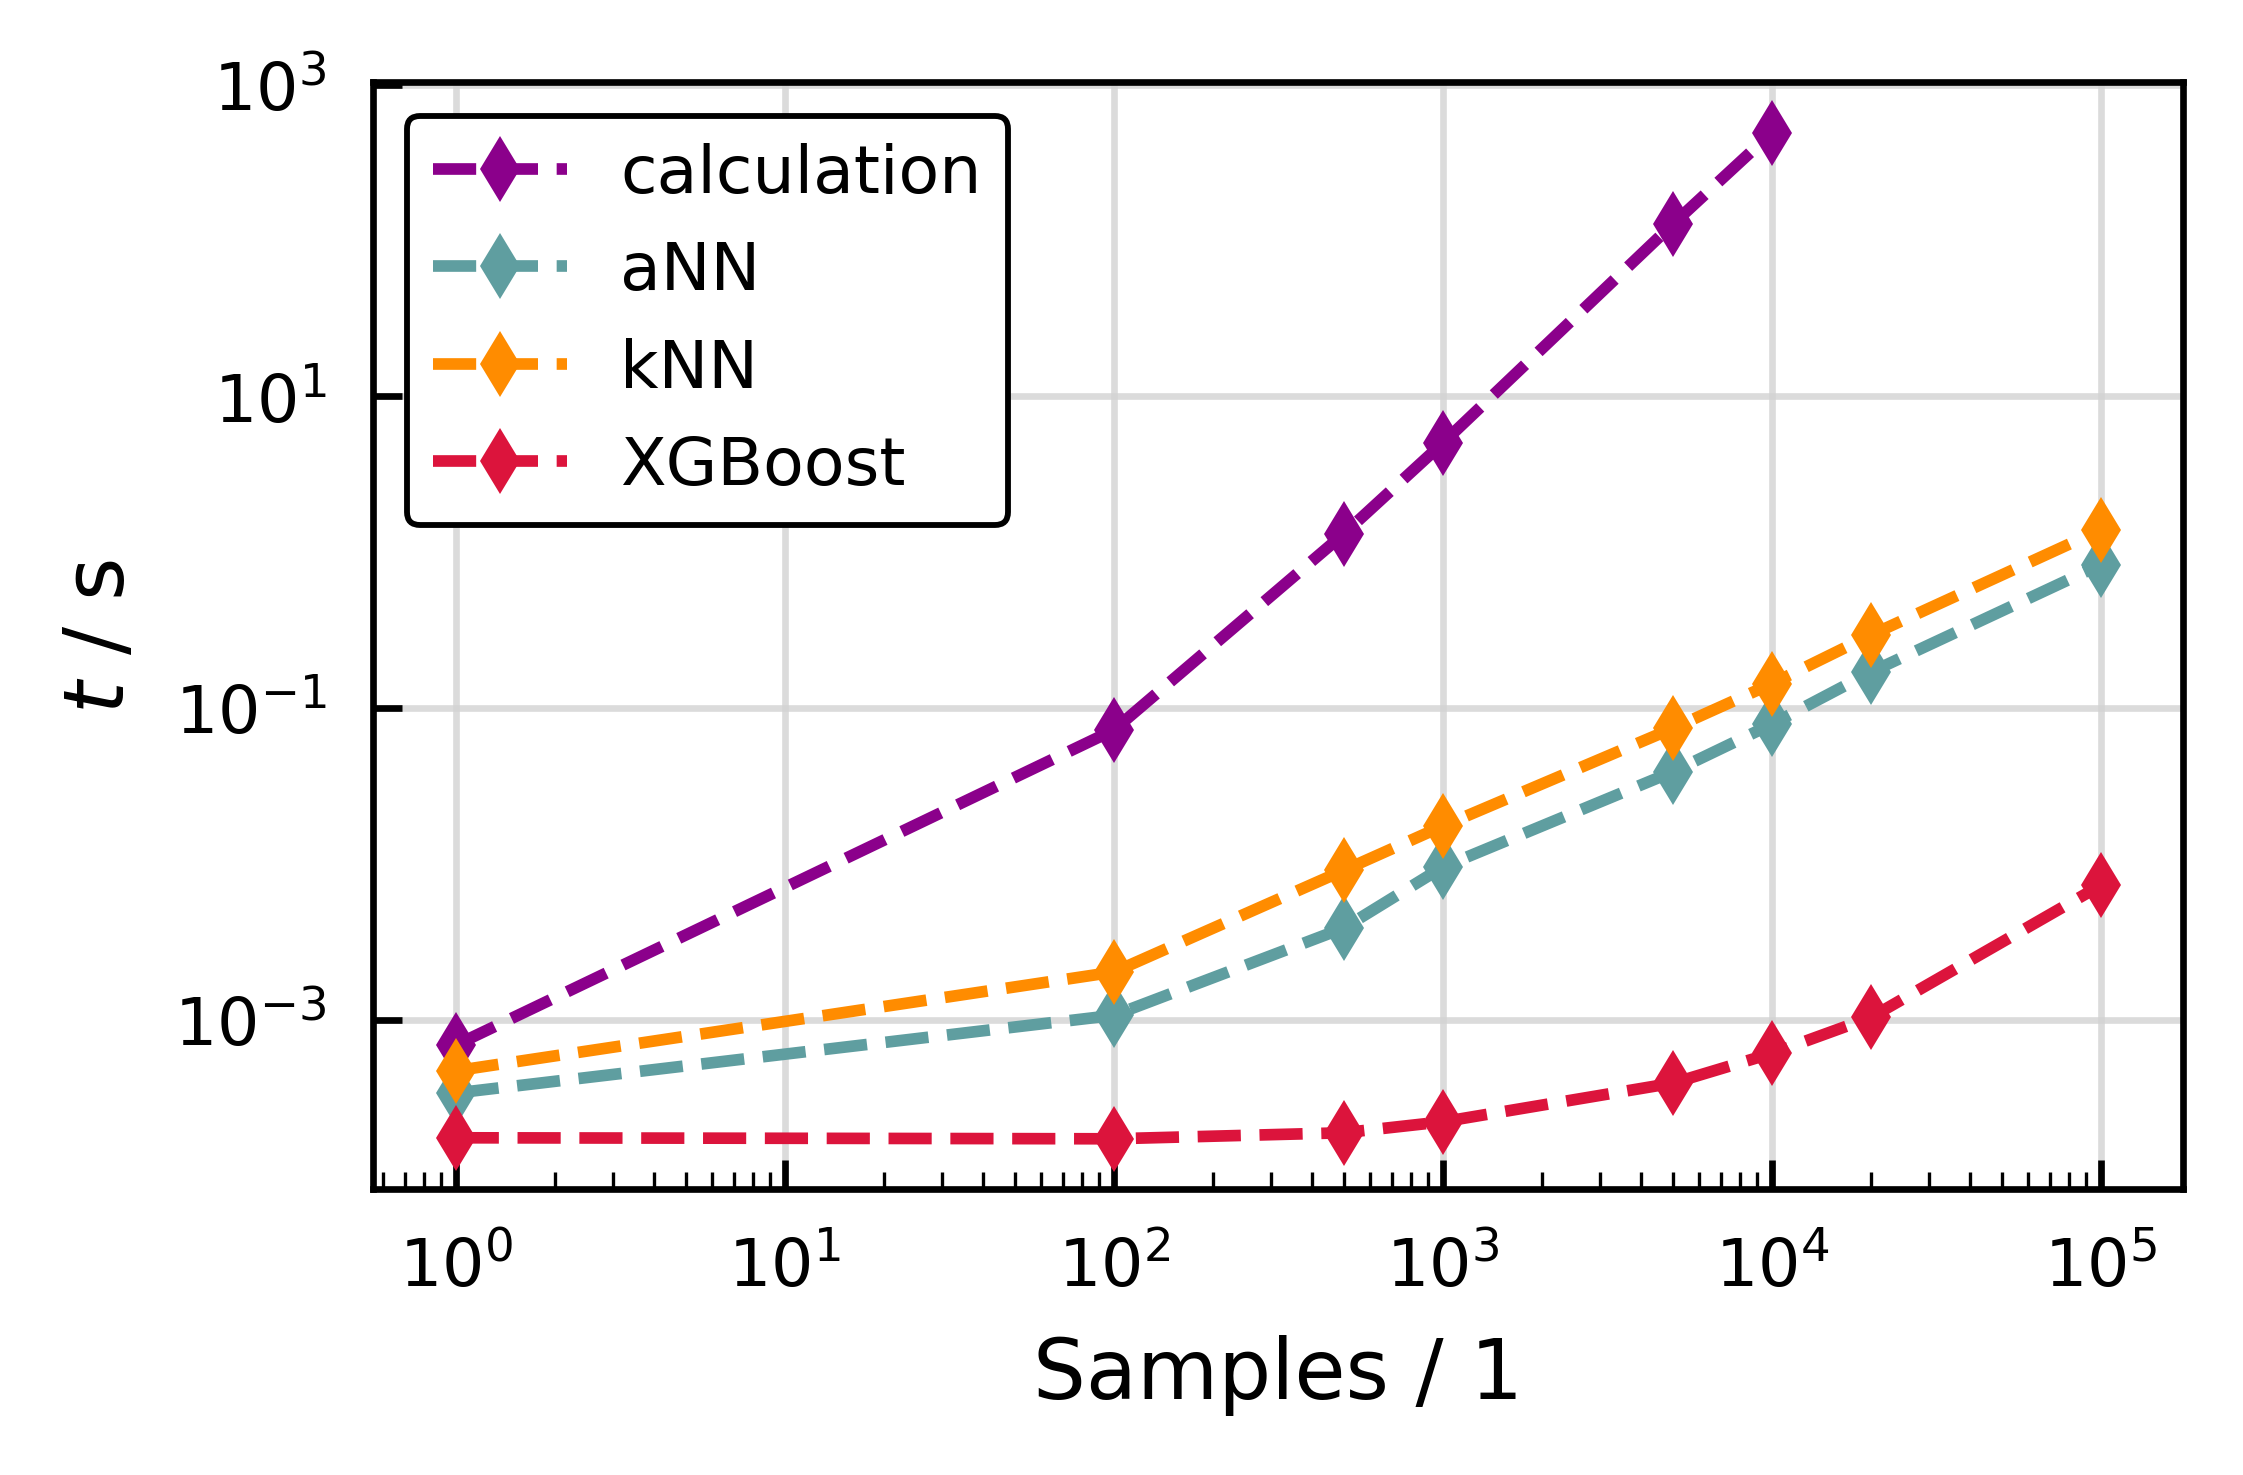

In [9]:
fig,ax = plt.subplots(figsize=(9.75*cm, 6.5*cm))

ax.loglog([1, 100, 500, 1000, 5000, 10000], calc_time, 'd--', label = 'calculation')
#ax.loglog(x_fit_calc, y_fit_calc, '-', color = 'rebeccapurple', label = ' calc fit')
ax.loglog([1, 100, 500, 1000, 5000, 10000, 20000, 100000], ann_time, 'd--', label = 'aNN')
ax.loglog([1, 100, 500, 1000, 5000, 10000, 20000, 100000], knn_time, 'd--', label = 'kNN')
ax.loglog([1, 100, 500, 1000, 5000, 10000, 20000, 100000], xgb_time, 'd--', label = 'XGBoost')

ax.set(xlabel = 'Samples / 1', ylabel = '$t$ / s')
ax.tick_params(direction = 'in') #, length = 20, width = 3)
ax.legend(loc='upper left')
ax.grid()
#ax.set(ylim=(1e-4,1e3))
#ax.legend(['$\\mathregular{R^2}$ = ', r2(xi_real,xi_pred)], markerscale=0)

#fig.suptitle("Parity Plot")
plt.tight_layout()
plt.show()



In [10]:
#fig.savefig(Path.cwd().parent / 'plots/vgl/TKA_SRA_PV_001_laufzeit.png', bbox_inches = 'tight')

C:\Users\sinar\AppData\Local\Temp\ipykernel_20456\1187036762.py:3: RuntimeWarning: overflow encountered in exp
  exp = np.exp(x)
C:\Users\sinar\anaconda3\envs\BA\lib\site-packages\matplotlib\axes\_base.py:2919: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])
C:\Users\sinar\anaconda3\envs\BA\lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)
C:\Users\sinar\AppData\Local\Temp\ipykernel_20456\1187036762.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set(xlim=(0,10), ylim=(0,10))
C:\Users\sinar\AppData\Local\Temp\ipykernel_20456\1187036762.py:22: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2].set(xlim=(0,1000), ylim=(0,1000))
C:\Users\sinar\AppData\Local\Temp\ipykernel_20456\1187036762.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axi

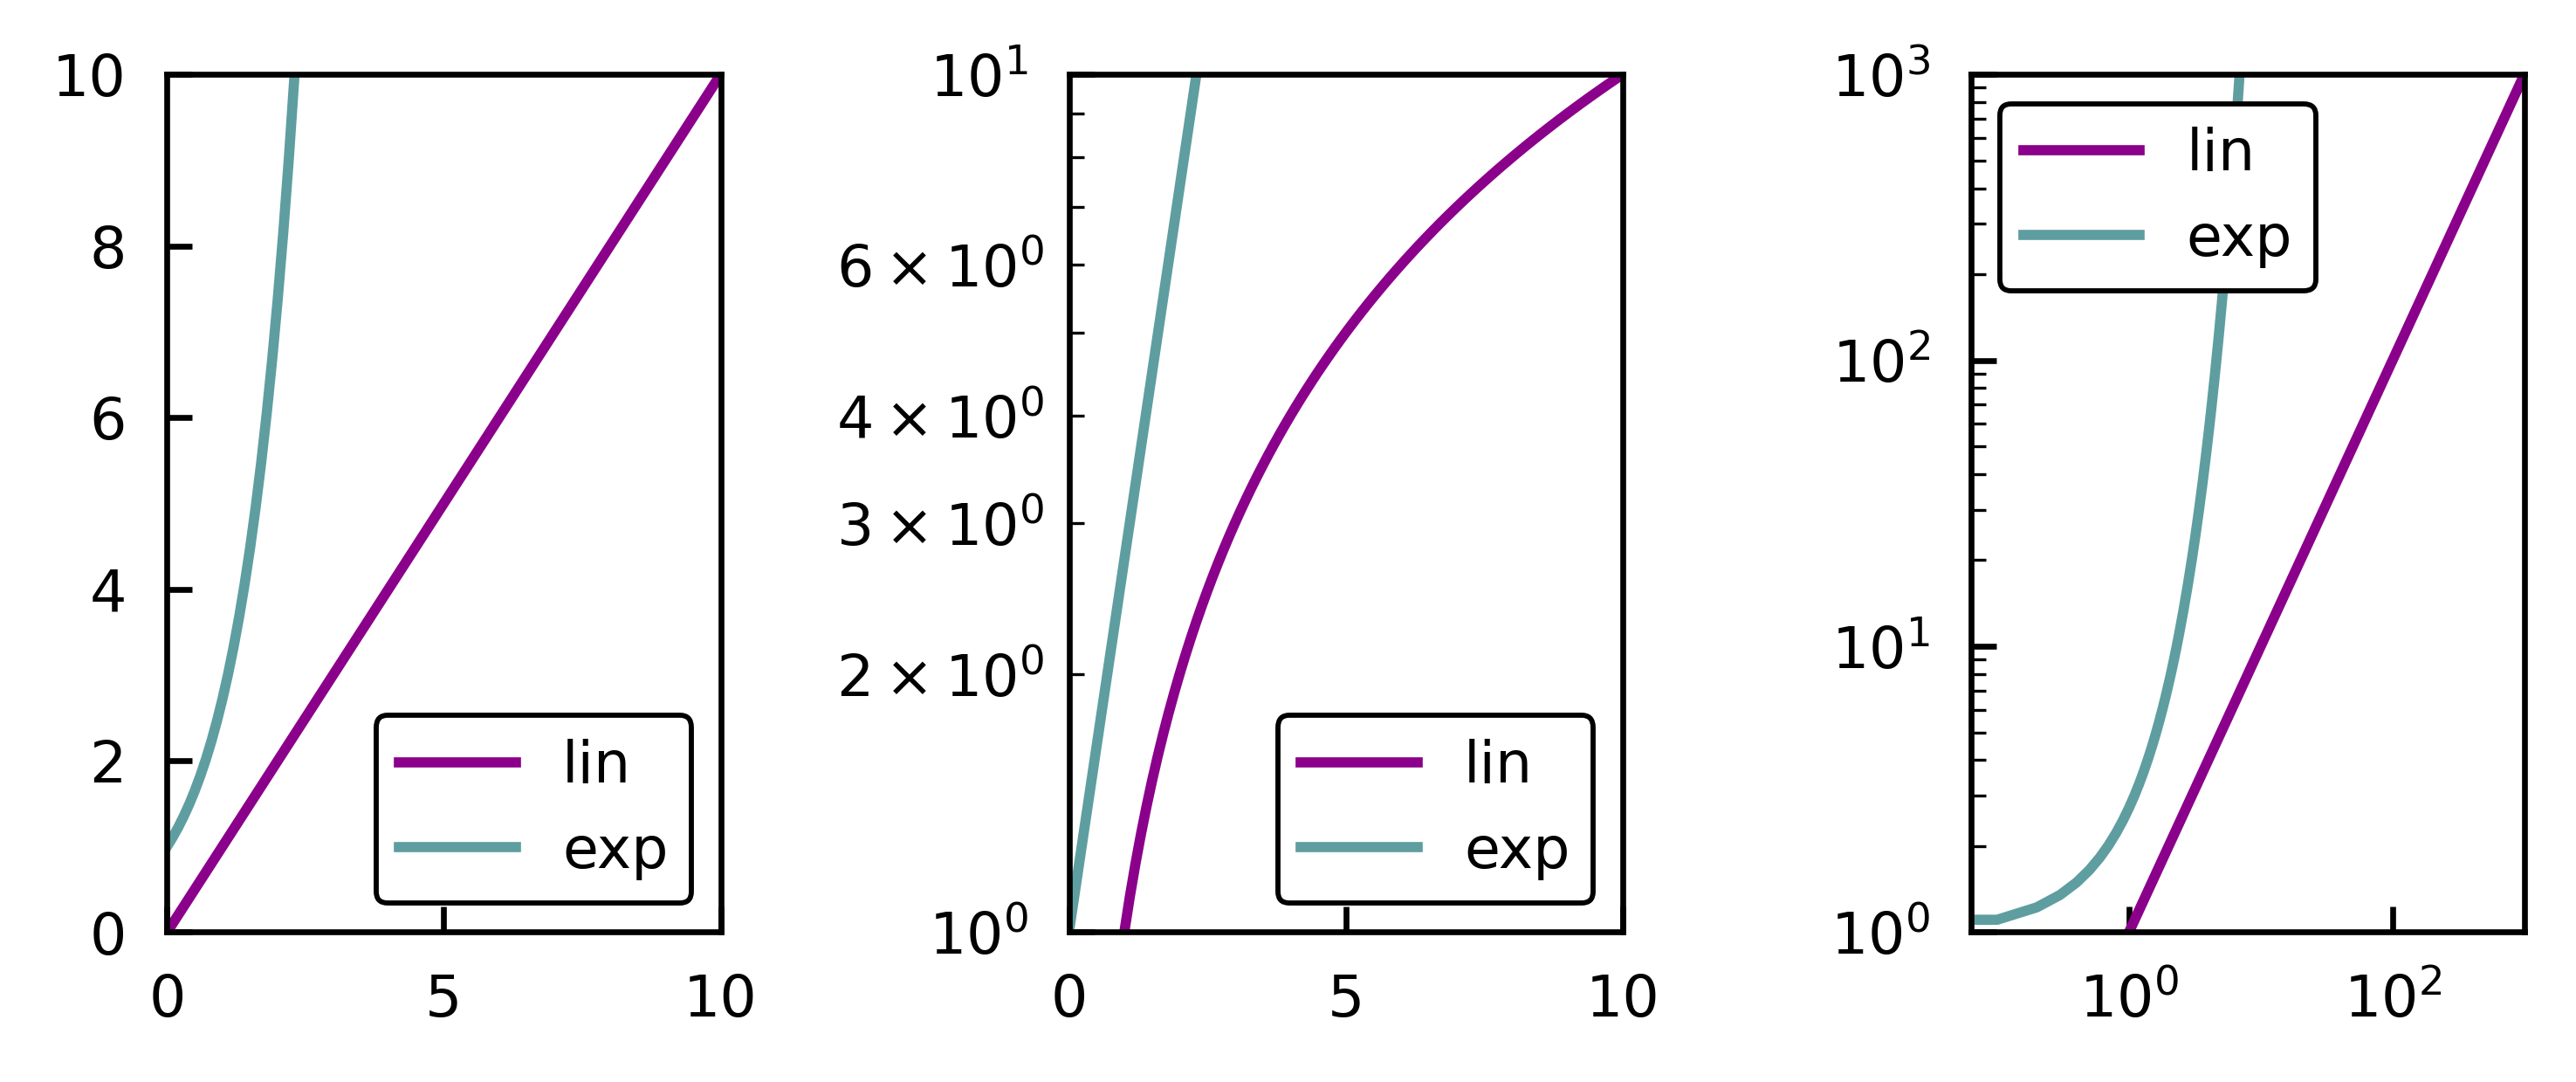

In [11]:
x = np.linspace(0,1000, 10000)
lin = x
exp = np.exp(x)

#print(asymp)

fig,ax = plt.subplots(1,3, figsize=(12.75*cm,5.5*cm))

ax[0].plot(x, lin, label='lin')
ax[0].plot(x, exp, label='exp')
ax[0].legend()
ax[0].set(xlim=(0,10), ylim=(0,10))

ax[1].semilogy(x, lin, label='lin')
ax[1].semilogy(x, exp, label='exp')
ax[1].legend()
ax[1].set(xlim=(0,10), ylim=(0,10))

ax[2].loglog(x, lin, label='lin')
ax[2].loglog(x, exp, label='exp')
ax[2].legend()
ax[2].set(xlim=(0,1000), ylim=(0,1000))

plt.tight_layout()
plt.show()